In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm
from itertools import combinations

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [13]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lineages = 30
test_cases = 10

In [3]:
# Run for tournament, varying num_competitors

selection_method = 'tournament'
range_num_competitors = np.linspace(1, 20, test_cases, dtype=int)

total_combinations = len(target_expressions) * len(range_num_competitors) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for num_competitors in range_num_competitors:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection=selection_method, # Dependant variable
            num_competitors=num_competitors, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection_method': selection_method,
                    'num_competitors': num_competitors,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/selection_methods/tournament.csv', index=False)

Processing combinations: 100%|██████████| 30/30 [11:19<00:00, 22.65s/it, Elapsed=679.44s, ETA=0.00s]  


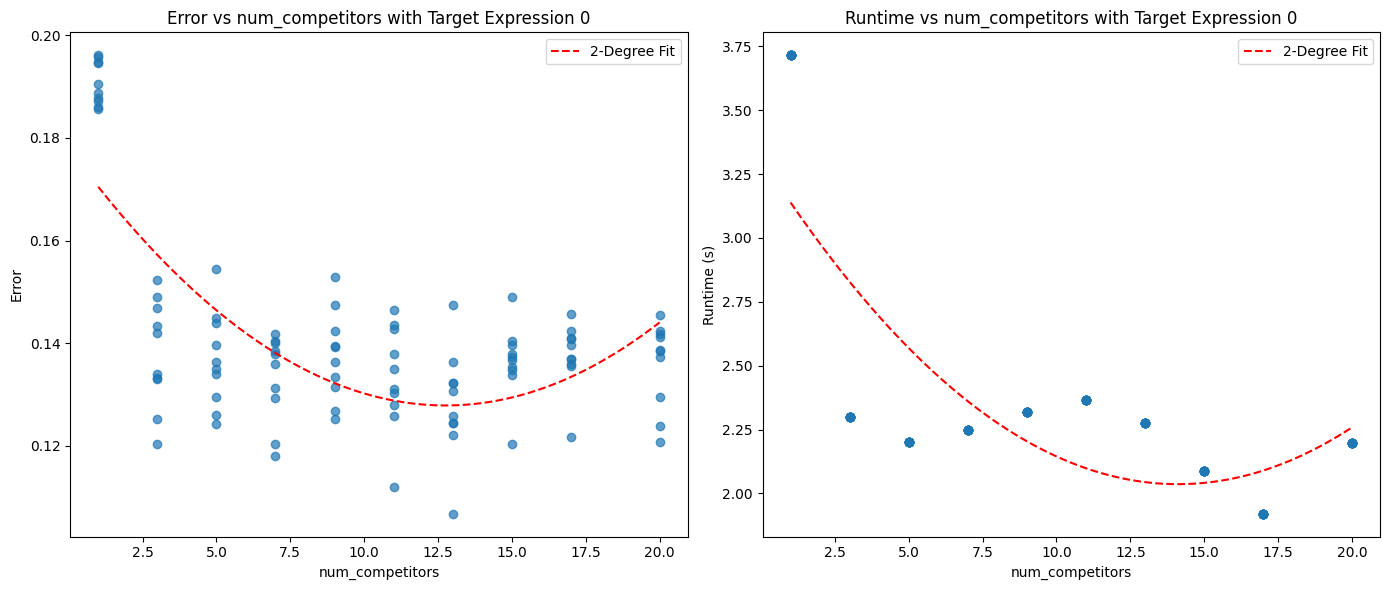

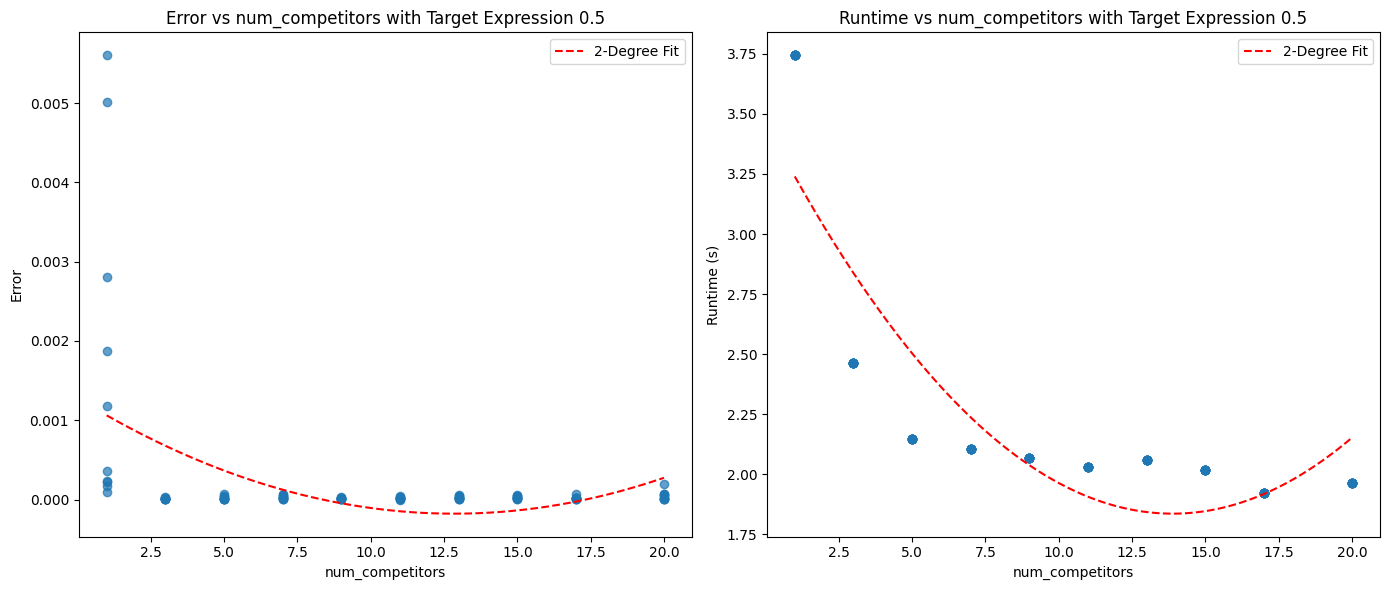

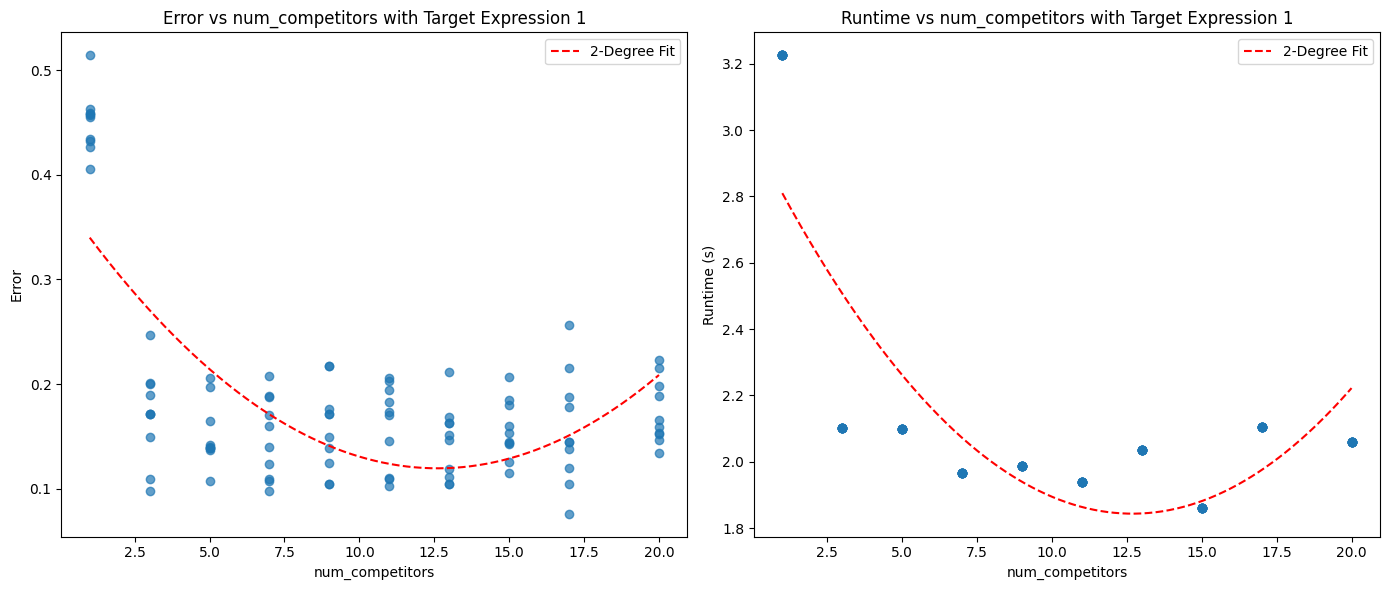

In [4]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'num_competitors', polynomial_degree=2)

In [5]:
# Run for tournament_pop, varying num_competitors

selection_method = 'tournament_pop'
range_num_competitors = np.linspace(1, 20, test_cases, dtype=int)

total_combinations = len(target_expressions) * len(range_num_competitors) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for num_competitors in range_num_competitors:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection=selection_method, # Dependant variable
            num_competitors=num_competitors, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection_method': selection_method,
                    'num_competitors': num_competitors,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/selection_methods/tournament_pop.csv', index=False)

Processing combinations: 100%|██████████| 30/30 [13:43<00:00, 27.45s/it, Elapsed=823.36s, ETA=0.00s]  


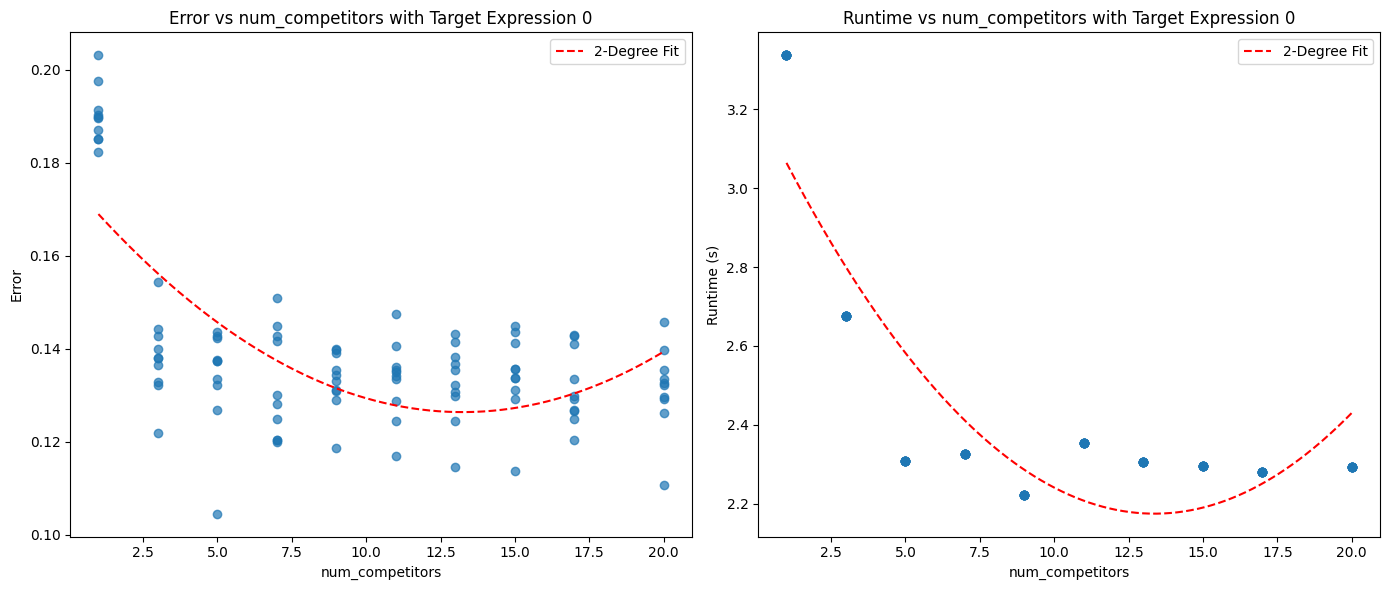

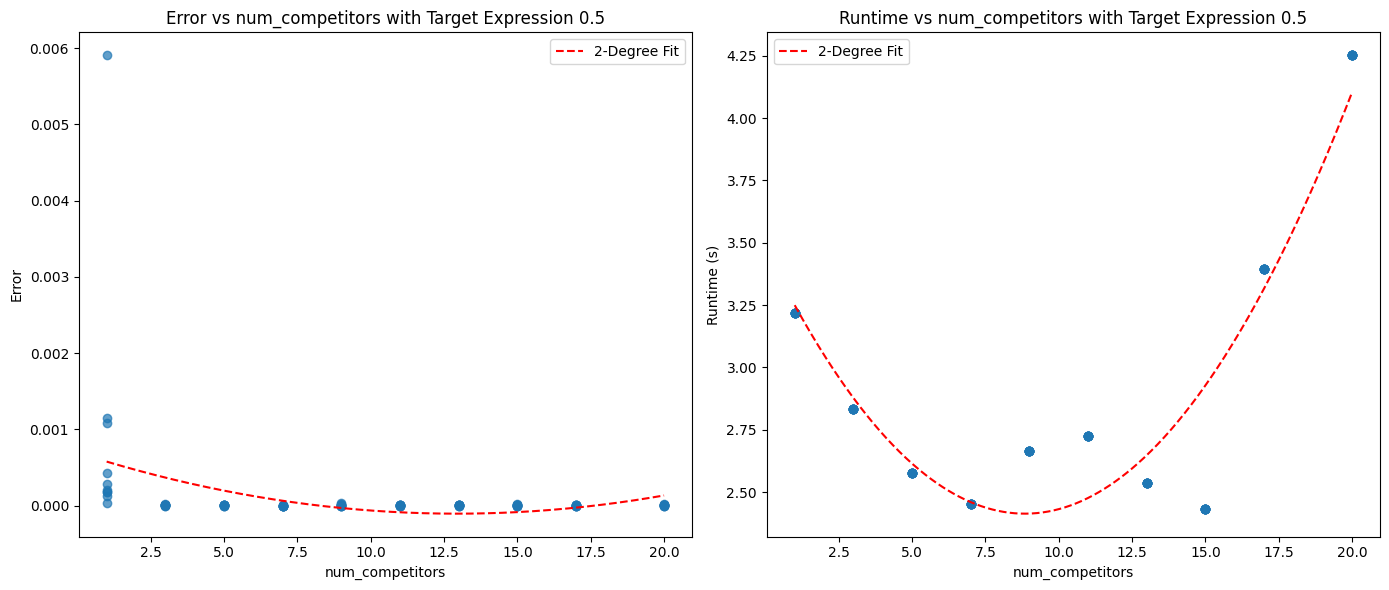

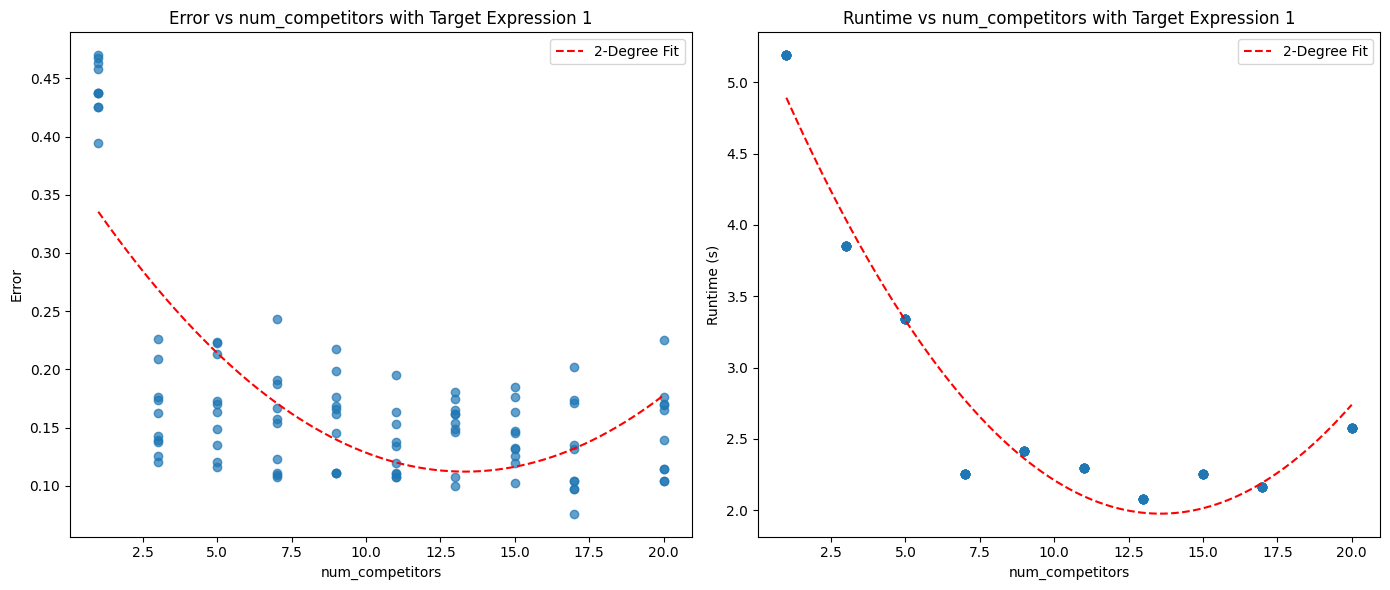

In [6]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'num_competitors', polynomial_degree=2)

In [ ]:
# Run for boltzmann, varying boltzmann_temperature

selection_method = 'boltzmann'
range_boltzmann_temperature = np.linspace(0.1, 1, test_cases, dtype=float)

total_combinations = len(target_expressions) * len(range_boltzmann_temperature) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for boltzmann_temperature in range_boltzmann_temperature:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection=selection_method, # Dependant variable
            boltzmann_temperature=boltzmann_temperature, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection_method': selection_method,
                    'boltzmann_temperature': boltzmann_temperature,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })
        

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/selection_methods/boltzmann_1.csv', index=False)

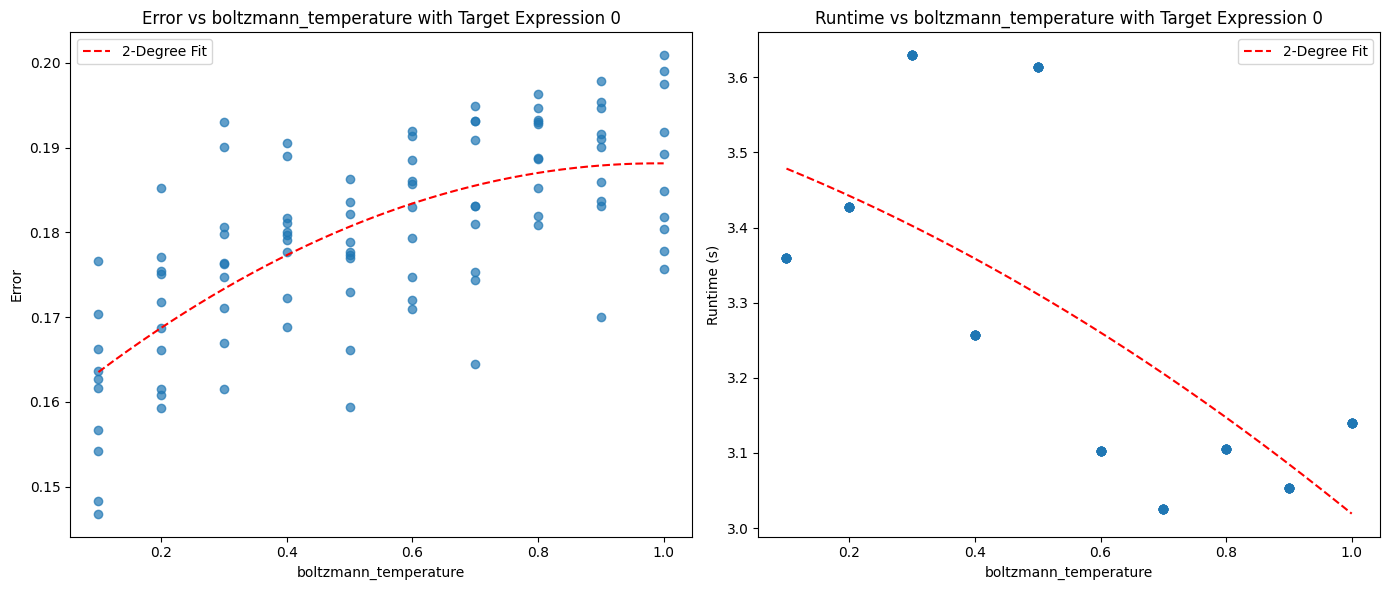

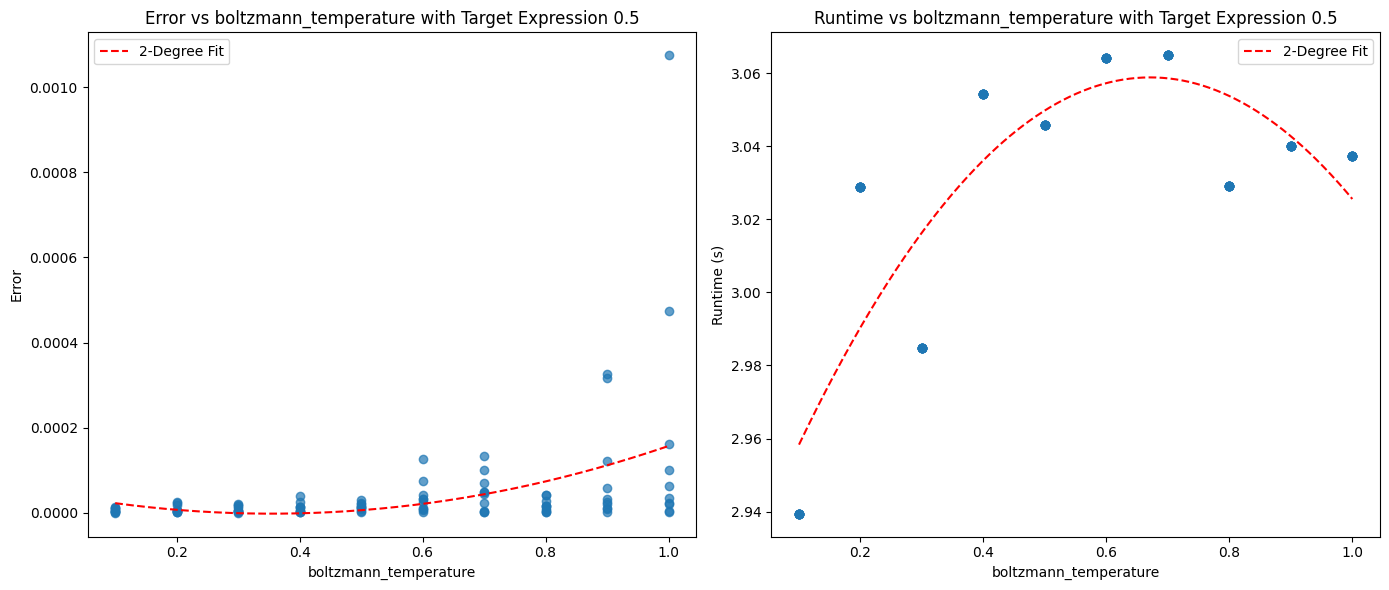

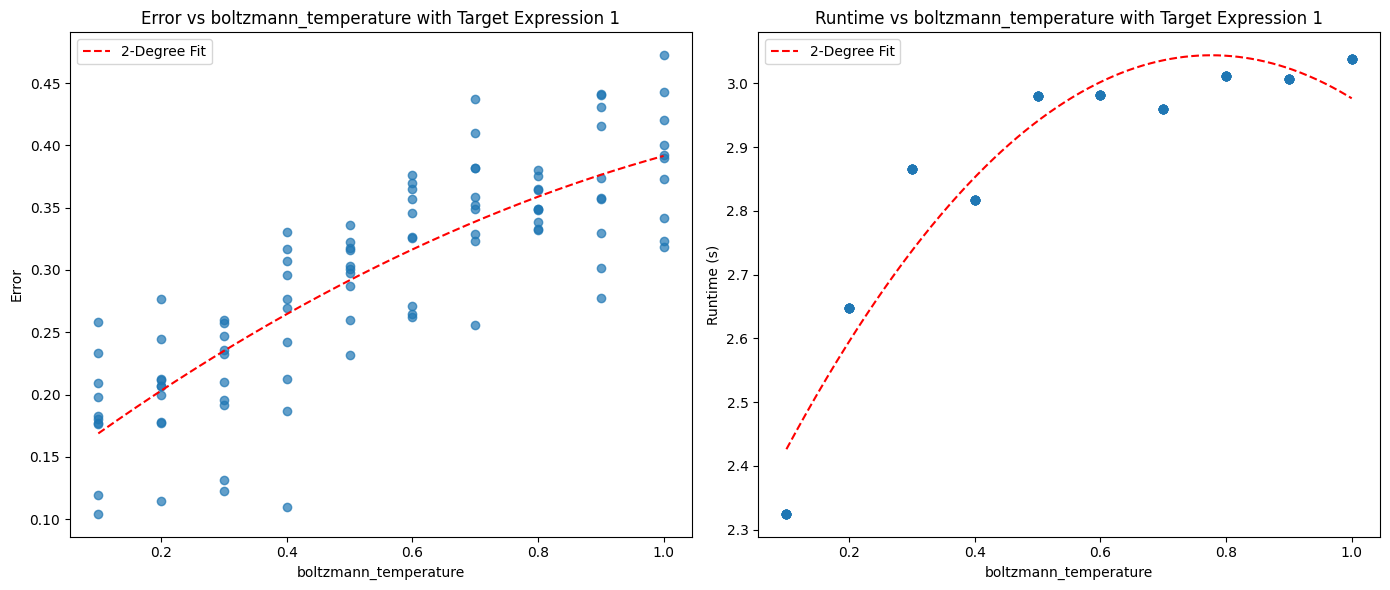

In [8]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'boltzmann_temperature', polynomial_degree=2)

In [16]:
# Run for boltzmann, varying boltzmann_temperature

selection_method = 'boltzmann'
range_boltzmann_temperature = np.linspace(0.01, 0.1, test_cases, dtype=float)

total_combinations = len(target_expressions) * len(range_boltzmann_temperature) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for boltzmann_temperature in range_boltzmann_temperature:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection=selection_method, # Dependant variable
            boltzmann_temperature=boltzmann_temperature, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection_method': selection_method,
                    'boltzmann_temperature': boltzmann_temperature,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lineages
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/selection_methods/boltzmann_2.csv', index=False)

Processing combinations: 100%|██████████| 30/30 [13:21<00:00, 26.70s/it, Elapsed=801.09s, ETA=0.00s]   


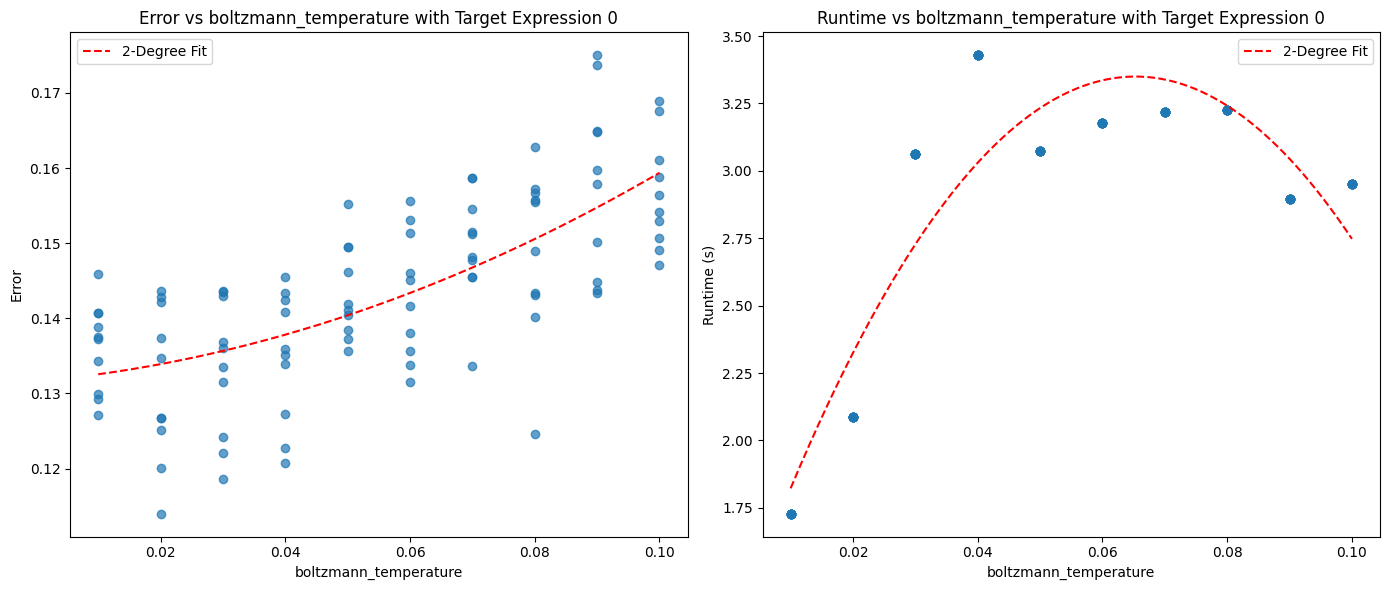

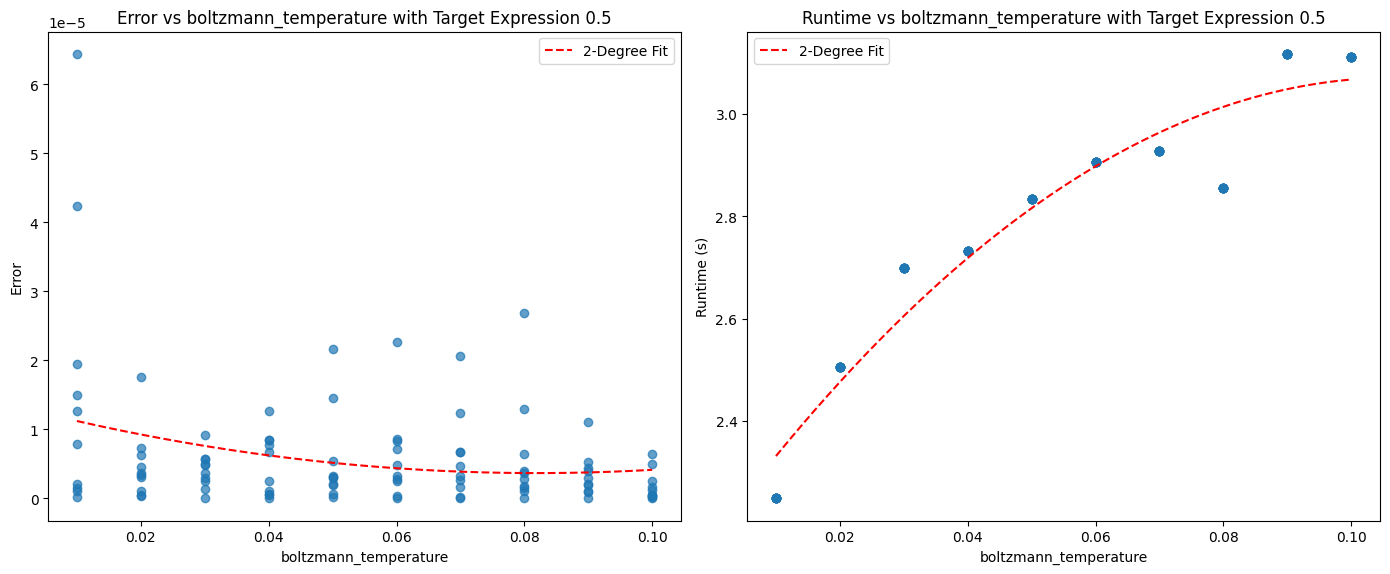

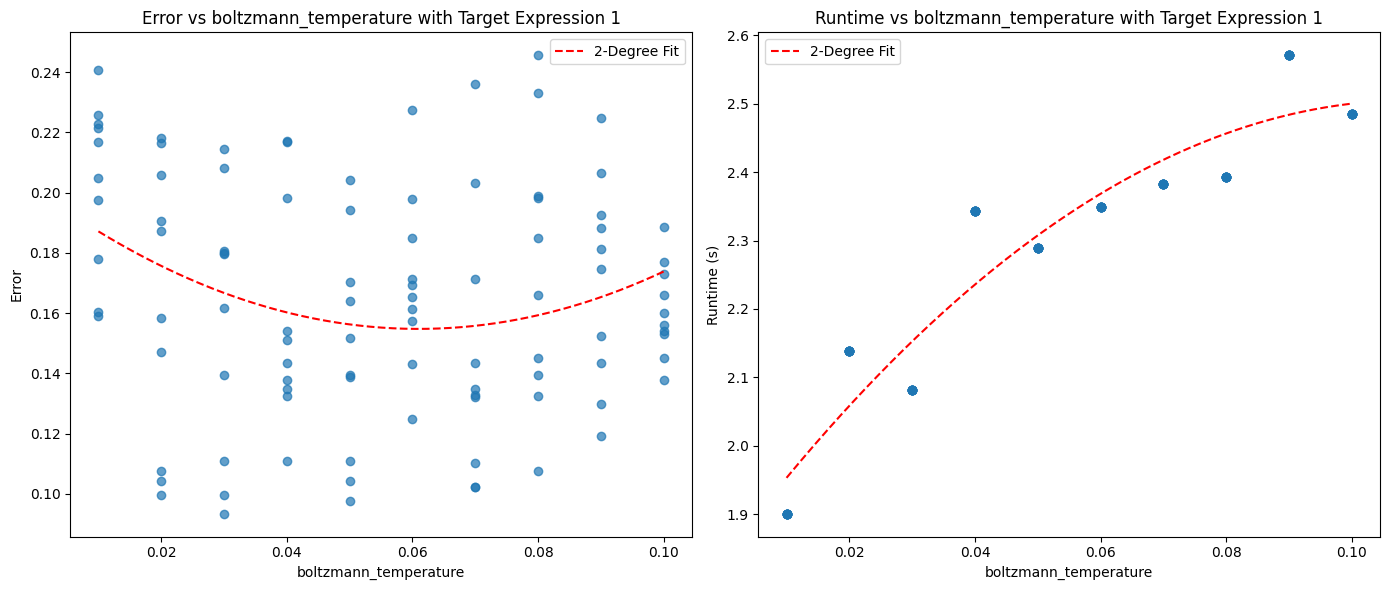

In [17]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'boltzmann_temperature', polynomial_degree=2)

In [ ]:
# For each selection method, vary elitist_rate
selection_methods = ['tournament', 'tournament_pop', 'roulette', 'linear_scaling', 'rank_based', 'sus', 'truncation', 'boltzmann']
range_elitist_rate = np.linspace(0, 1, test_cases)

total_combinations = len(target_expressions) * len(selection_methods) * len(range_elitist_rate) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for selection_method in selection_methods:
        for elitist_rate in range_elitist_rate:
            current_combination += 1
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                selection=selection_method, # Dependant variable
                elitist_rate=elitist_rate, # Dependant variable
            )
            for _ in range(lineages):
                current_combination += 1

                # Time the run
                start_time = time.time()
                best_sequences, best_predictions = ga.run()
                end_time = time.time()

                # Record the results
                for sequence, prediction in zip(best_sequences, best_predictions):
                    results.append({
                        'target_expression': target_expression,
                        'selection_method' : selection_method,
                        'elitist_rate': elitist_rate,
                        'error': abs(prediction - target_expression),
                        'run_time': (end_time - start_time) / lineages
                    })
            
                # Update progress bar
                progress_bar.update(1)
                elapsed_time = time.time() - initial_time
                progress_bar.set_postfix({
                    "Elapsed": format_time(elapsed_time),
                    "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
                })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/mutation_methods/elitist_rates.csv', index=False)

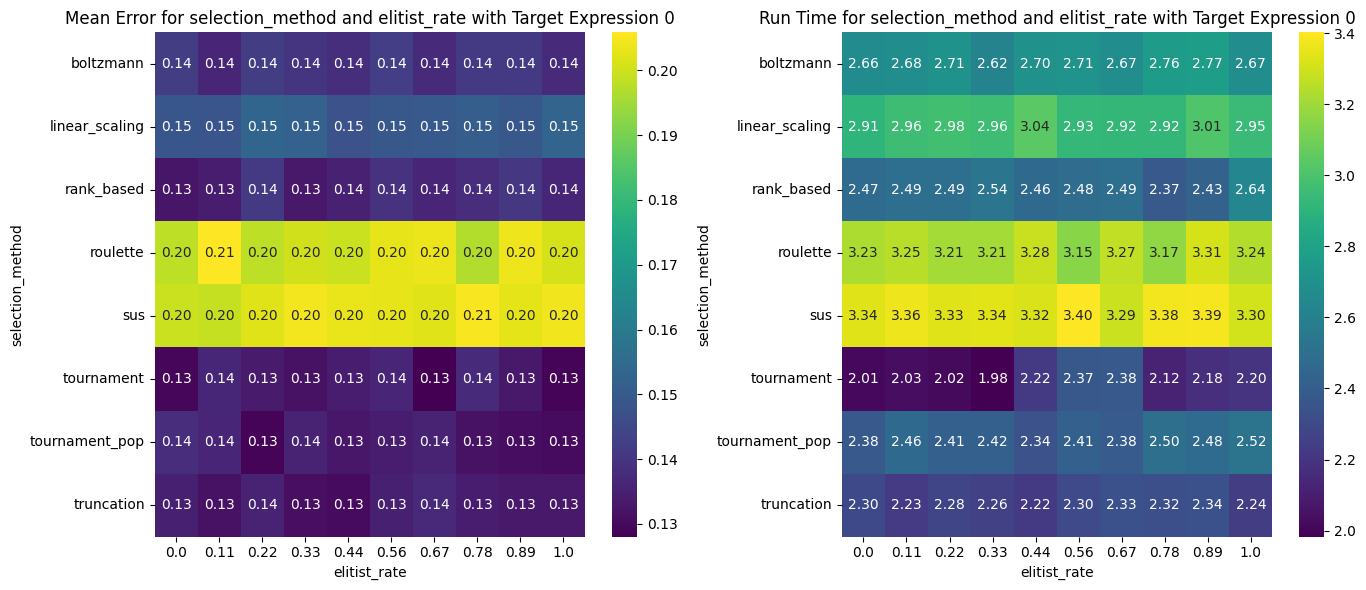

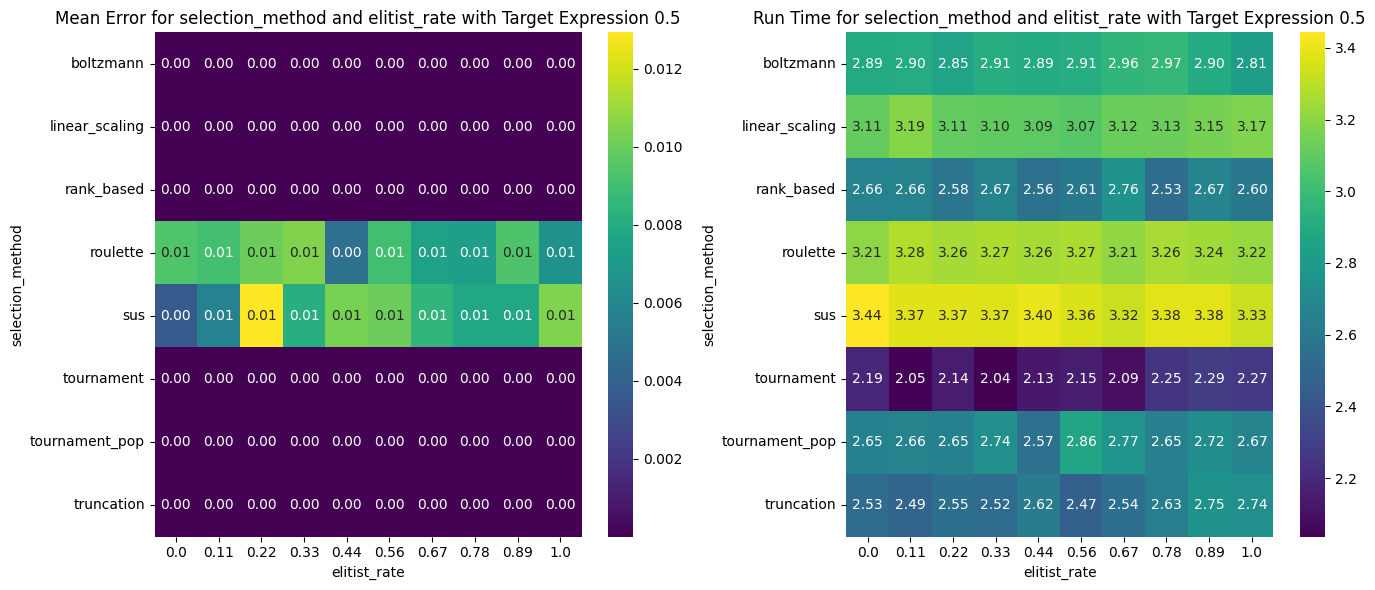

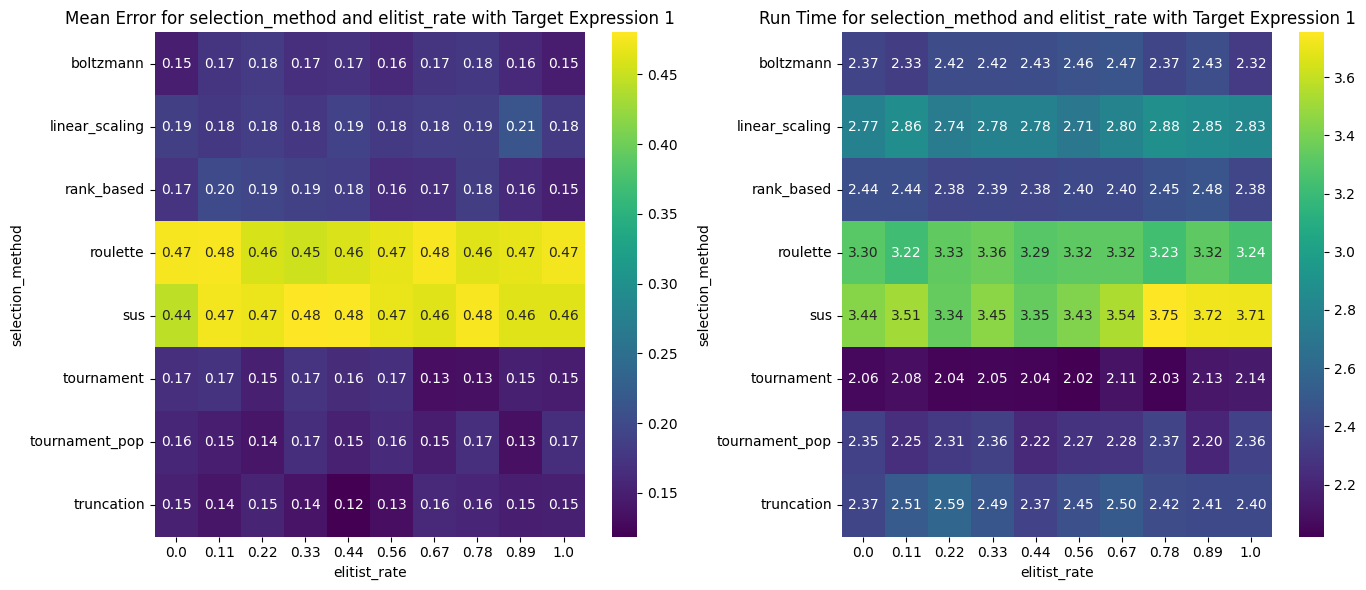

In [5]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'selection_method', 'elitist_rate')

In [14]:
# We define num_competitors/boltzmann_temperature in the GeneticAlgorithm class, so we don't need to vary it here

selection_methods = ['tournament', 'tournament_pop', 'roulette', 'linear_scaling', 'rank_based', 'sus', 'truncation', 'boltzmann']

total_combinations = len(target_expressions) * len(selection_methods) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for selection_method in selection_methods:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection=selection_method, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'selection_method': selection_method,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time)
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/selection_methods/comparison.csv', index=False)

Processing combinations:   0%|          | 0/720 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 720/720 [35:30<00:00,  2.96s/it, Elapsed=35.50min, ETA=0.00s]   


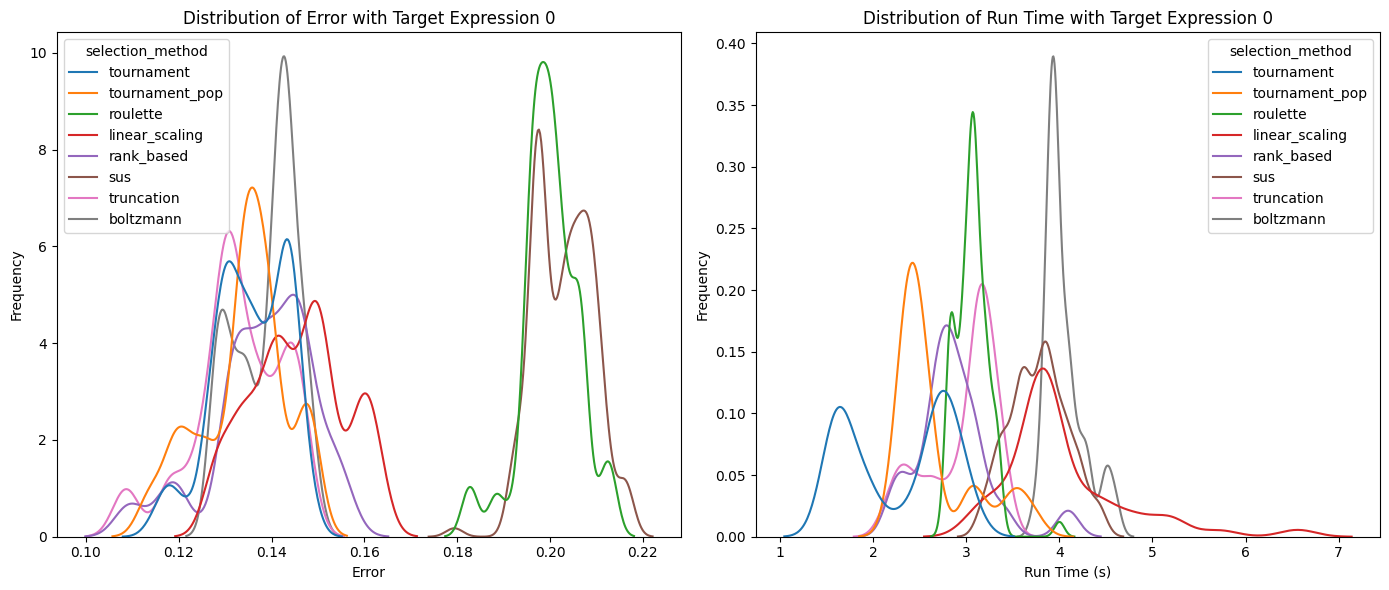

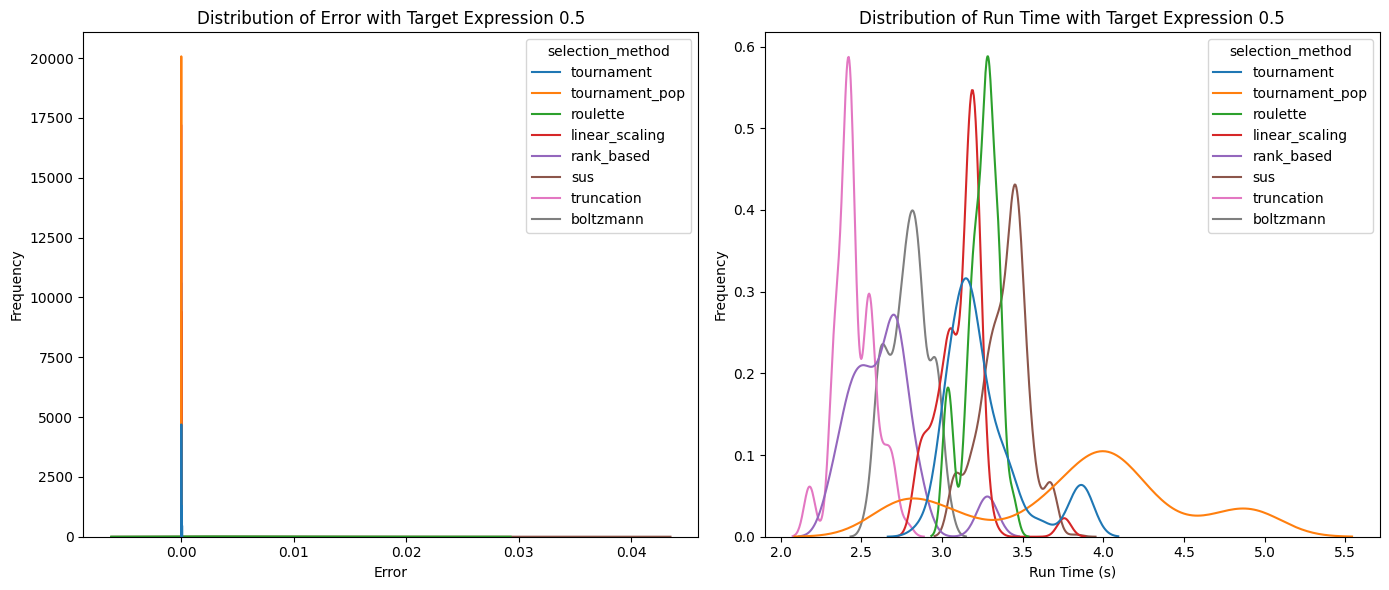

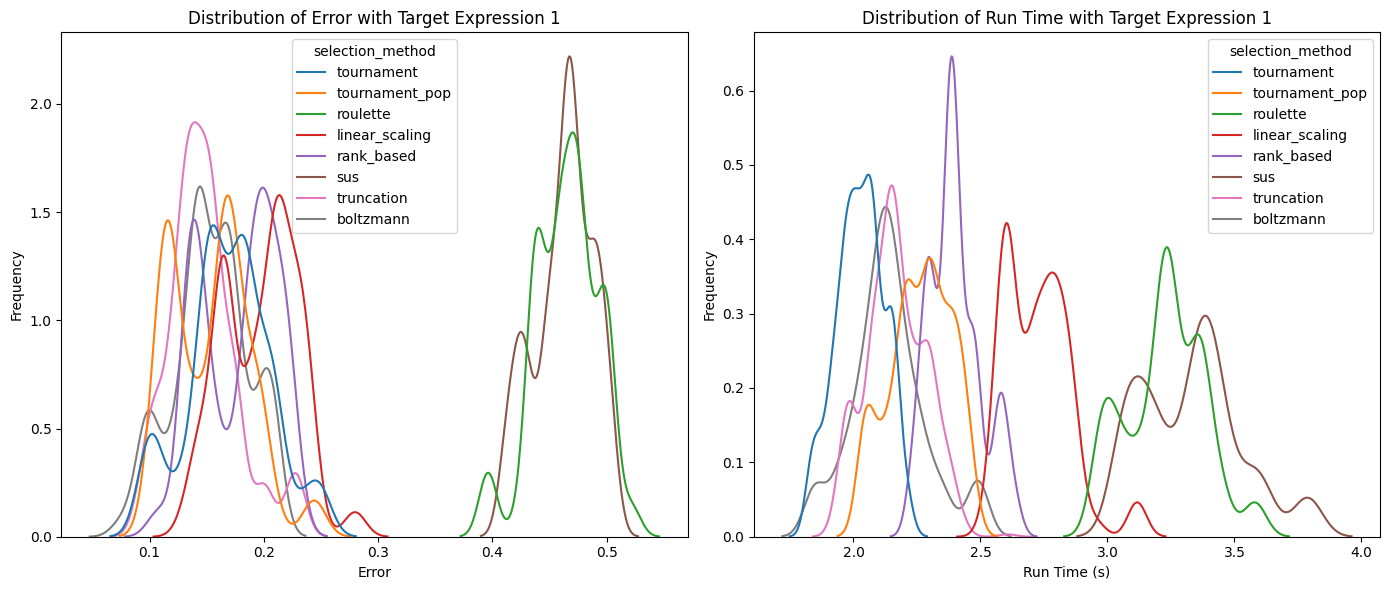

In [15]:
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'selection_method')

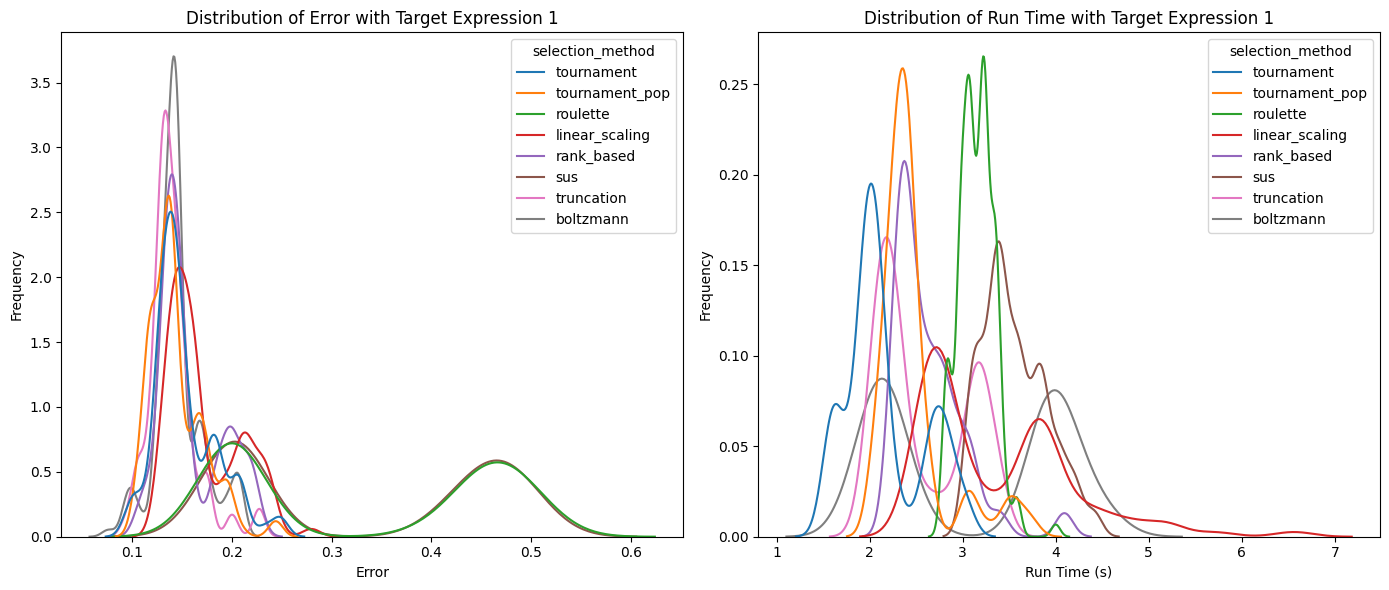

In [16]:
filter_df = results_df[results_df['target_expression'] != 0.5]
distribution_plot(filter_df, target_expression, 'selection_method')